Wykorzystanie modelu ekonometrycznego
do oszacowania wpływu parametrów
technicznych samolotów jednosilnikowych
na ich cenę <br> 
Projekt zaliczeniowy z przedmiotu: <br> Narzędzia ekonometryczne w analizie danych

1. Określenie problemu badawczego <br> 
Przeprowadzona w projekcie analiza miała na celu zbadanie zależności pomiędzy
parametrami technicznymi, a ceną samolotów jednosilnikowych produkowanych w latach
1947 – 1979 r.

2. Opis wykorzystanych danych
Wykorzystane w analizie dane pochodzą z pakietu „robustbase” dostępnego w R-Studio.
Dotyczą one 23 jednosilnikowych samolotów zbudowanych w latach 1947-1979 oraz pochodzą
z Office of Naval Research. <br> Źródło: P. J. Rousseeuw and A. M. Leroy (1987) Robust
Regression and Outlier Detection; Wiley, page 154, table 22.
Do analizy wykorzystano zbiór danych zawierający 1 zmienną objaśnianą i 4 zmienne
objaśniające: <br>
• Y – Cena samolotu (w 100 000$);<br>
• X1 – Aspect ratio (pl. wydłużenie płata – oblicza się je dzieląc kwadrat rozpiętości przez
powierzchnię nośną);<br>
• X2 – Lift-to-Drag Ratio (pl. doskonałość aerodynamiczna - stosunek współczynnika
siły nośnej do współczynnika oporu);<br>
• X3 – waga samolotu (w funtach);<br>
• X4 – maksymalny ciąg

In [ ]:
install.packages("olsrr")
install.packages("robustbase")

In [ ]:
library(olsrr)
library(robustbase)

In [20]:
# dane "aircraft" z pakietu robustbase 

data(aircraft, package="robustbase")
head(aircraft, 10)

X1,X2,X3,X4,Y
6.3,1.7,8176,4500,2.76
6.0,1.9,6699,3120,4.76
5.9,1.5,9663,6300,8.75
3.0,1.2,12837,9800,7.78
5.0,1.8,10205,4900,6.18
6.3,2.0,14890,6500,9.50
5.6,1.6,13836,8920,5.14
3.6,1.2,11628,14500,4.76
2.0,1.4,15225,14800,16.70
2.9,2.3,18691,10900,27.68


### Stworzenie modelu

In [22]:
# model nr 1
model_1 <- lm(data = aircraft, Y~X1+X2+X3+X4)
summary(model_1)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = aircraft)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.891  -3.955  -1.233   5.753  17.594 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.7913892 10.1157023  -0.375  0.71219    
X1          -3.8529189  1.7630016  -2.185  0.04232 *  
X2           2.4882665  1.1867538   2.097  0.05042 .  
X3           0.0034988  0.0004790   7.305 8.72e-07 ***
X4          -0.0019537  0.0004986  -3.918  0.00101 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.406 on 18 degrees of freedom
Multiple R-squared:  0.8836,	Adjusted R-squared:  0.8578 
F-statistic: 34.17 on 4 and 18 DF,  p-value: 3.501e-08


In [23]:
# model nr 2
model_2 <- lm(data = aircraft, Y~X1+X3+X4)
summary(model_2)


Call:
lm(formula = Y ~ X1 + X3 + X4, data = aircraft)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.818  -5.673  -1.435   4.419  19.448 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.4741002 10.9813903  -0.316  0.75518    
X1          -2.9905703  1.8612765  -1.607  0.12461    
X3           0.0032615  0.0005053   6.455 3.46e-06 ***
X4          -0.0014778  0.0004820  -3.066  0.00636 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.126 on 19 degrees of freedom
Multiple R-squared:  0.8552,	Adjusted R-squared:  0.8324 
F-statistic: 37.41 on 3 and 19 DF,  p-value: 3.581e-08


In [24]:
# model nr 3
model_3 <- lm(data = aircraft, Y~X3+X4)
summary(model_3)


Call:
lm(formula = Y ~ X3 + X4, data = aircraft)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9947  -3.2270   0.4554   4.2111  20.0868 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.973e+01  4.438e+00  -4.445 0.000249 ***
X3           3.314e-03  5.238e-04   6.328 3.55e-06 ***
X4          -1.251e-03  4.787e-04  -2.613 0.016642 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.48 on 20 degrees of freedom
Multiple R-squared:  0.8356,	Adjusted R-squared:  0.8191 
F-statistic: 50.81 on 2 and 20 DF,  p-value: 1.447e-08


Ostateczny wybór padł jednak na model 1. Postanowiono go przyjąć na poziomie
istotności α=0,1, dzięki czemu wszystkie zmienne okazały się istotne i trafiły do modelu. <br>
Skorygowany R2 dla modelu 1 wyniósł 85%, co jest wynikiem lepszym niż dla modelu 3 (81%). <br>
Większa liczba zmiennych, a co za tym idzie większa ilość zawartych informacji sprawiły
przeważyły szalę zwycięstwa na stronę modelu 1. <br> Współczynnik R
2 wyniósł 88% co świadczy
o bardzo dobrym dopasowaniu danych do modelu. <br>Ostateczny model prezentuje się
następująco: <br>
𝑌 = −3,853 X1 + 2,488 X2 + 0,003 X3 – 0,002 X4

• Wraz ze wzrostem Aspect ratio o 1 jednostke, cena samolotu maleje o '385 000dol' ceteris paribus; <br> 
• Wraz ze wzrostem Lift-to-Drag Ratio o 1 jednostke, cena samolotu wzrasta o '248 800dol' ceteris paribus; <br>
• Wraz ze wzrostem wagi samolotu o 1 funt, cena samolotu wzrasta o 300dol ceteris
paribus; <br>
• Wraz ze wzrostem maksymalnego ciągu o 1 jednostkę, cena samolotu wzrasta o 200dol
ceteris paribus; <br>

### Wykres diagnostyczny do modelu nr 1

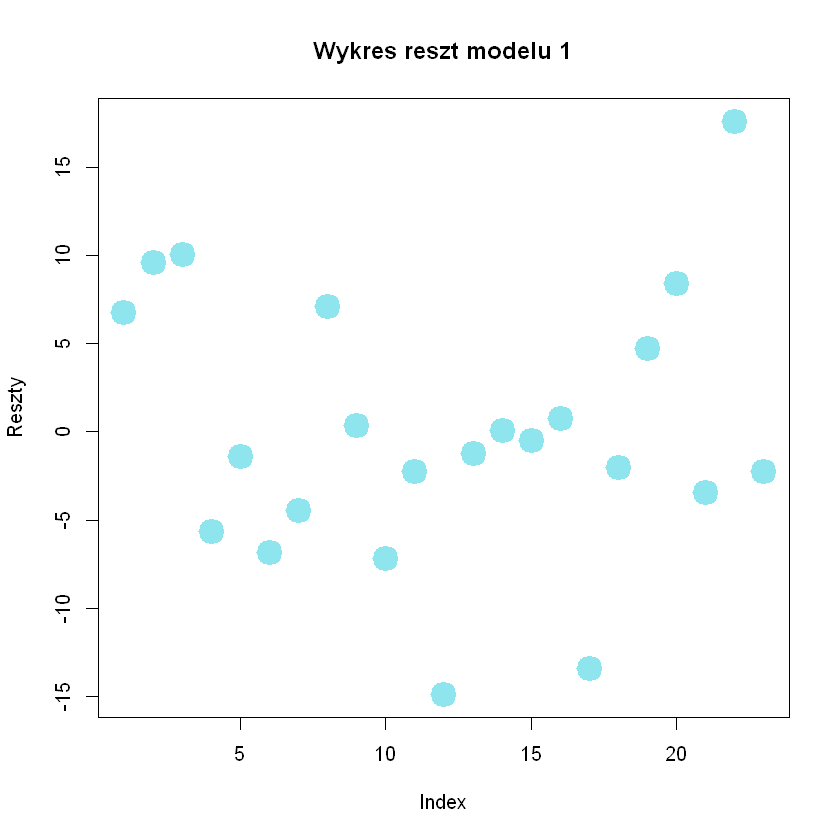

In [33]:
plot(model_1$residuals,
     main = 'Wykres reszt modelu 1',
     ylab = 'Reszty',
     col = 'cadetblue2', lwd=15)

W celu statystycznego potwierdzenia normalności reszt rozkładu, został przeprowadzony test
Shapiro-wilka.

In [34]:
shapiro.test(model_1$residuals)


	Shapiro-Wilk normality test

data:  model_1$residuals
W = 0.97007, p-value = 0.6908


Wartość p jest zdecydowanie wyższa od przyjętego poziomu istotności α=0,1. Potwierdza to
przypuszczenia płynące z wykresu – rozkład reszt jest normalny.

### Obliczenie MAE i MSE

In [35]:
sum_reszt <- sum(abs(model_1$residuals))
n <- 23

MAE <- sum_reszt/n
MAE

kwa_reszt <- sum(model_1$residuals^2)

MSE <- kwa_reszt/n
sqrt(MSE)


[1] 5.685573

[1] 7.436229

### weryfikacja istnienia problemu współliniowości <br>

### wyniki ols_regress {olsrr}

In [36]:
ols_regress(data = aircraft, Y~X1+X2+X3+X4)

                        Model Summary                          
--------------------------------------------------------------
R                       0.940       RMSE                8.406 
R-Squared               0.884       Coef. Var          41.353 
Adj. R-Squared          0.858       MSE                70.658 
Pred R-Squared          0.714       MAE                 5.686 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                 
---------------------------------------------------------------------
                 Sum of                                              
                Squares        DF    Mean Square      F         Sig. 
---------------------------------------------------------------------
Regression     9658.453         4       2414.613    34.173    0.0000 
Residual       1271.843        18         70.658     

### Tolerancja i VIF (Variance Inflation Factor)

### Ocena współliniowości

In [38]:
ols_coll_diag(model_1)
### dla wyrzu wolnego, X1, X2 Condition Index ponizej 10, czyli ok
### dla X3, X4 Condition Index <10;30>, wiec nalezy sie przyjrzec

Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1        X1 0.5188004 1.927524
2        X2 0.6985447 1.431548
3        X3 0.1538220 6.501019
4        X4 0.1185881 8.432547


Eigenvalue and Condition Index
------------------------------
  Eigenvalue Condition Index   intercept          X1          X2          X3
1 4.34724160        1.000000 0.001492489 0.002377524 0.008934543 0.001555902
2 0.42605520        3.194287 0.006342241 0.066585006 0.002825651 0.010252378
3 0.18946152        4.790120 0.007955830 0.004244203 0.823526993 0.020756835
4 0.01964006       14.877690 0.981504002 0.833682340 0.002117784 0.110608991
5 0.01760163       15.715583 0.002705439 0.093110927 0.162595029 0.856825895
           X4
1 0.001588325
2 0.022364760
3 0.005470407
4 0.010269280
5 0.960307229

Dla wyrazu wolnego oraz zmiennych X1, X2 Condition Index wynosi mniej niż 10, co jest
uznawane za dobry znak.<br> Natomiast dla zmiennych X3, X4 Condition Index znajduje się w
przedziale <10; 30>, a co za tym idzie należy się bliżej przyjrzeć tym zmiennym. <br>Możliwe
wystąpienie współliniowości. 

In [37]:
ols_vif_tol(model_1)
### dla zadnej zmiennej tolerancja nie jest mniejsza niz 0,1 a wiec nie wystepuje problem z wspolliniowoscia
### dla wszystkich zmiennych wartosci VIF sa ponizej 10

Variables,Tolerance,VIF
X1,0.5188004,1.927524
X2,0.6985447,1.431548
X3,0.1538220,6.501019
X4,0.1185881,8.432547


Dla żadnej ze zmiennych tolerancja nie jest mniejsza niż 0,1, a więc nie występuje problem
z współliniowością. <br> Również dla wszystkich zmiennych wartości statystyki VIF są poniżej 10.
Wartości Tolerance i VIF pozwalają odrzucić poprzednie przypuszczenie dotyczące
współliniowości.<br>
W przypadku modelu 1 nie występuje współliniowość.


### Identyfikacja obserwacji odstających, o wysokiej dźwigni, wpływowych.

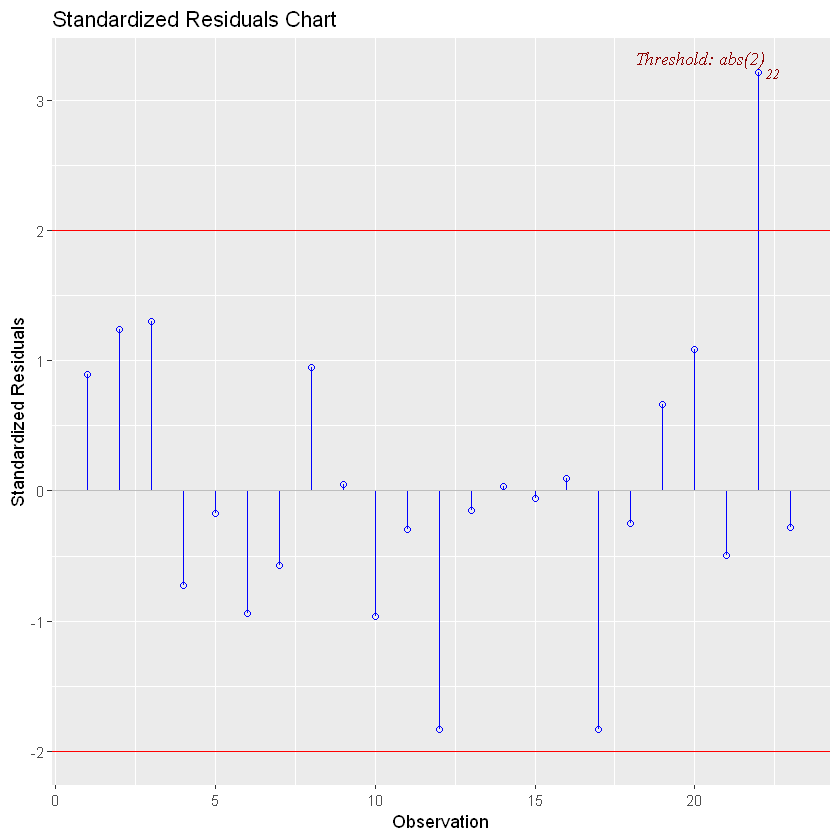

In [40]:
ols_plot_resid_stand(model_1)

Na wykresie standaryzowanych reszt można zaobserwować jedną obserwację odstającą. Jest to
obserwacja nr 22.

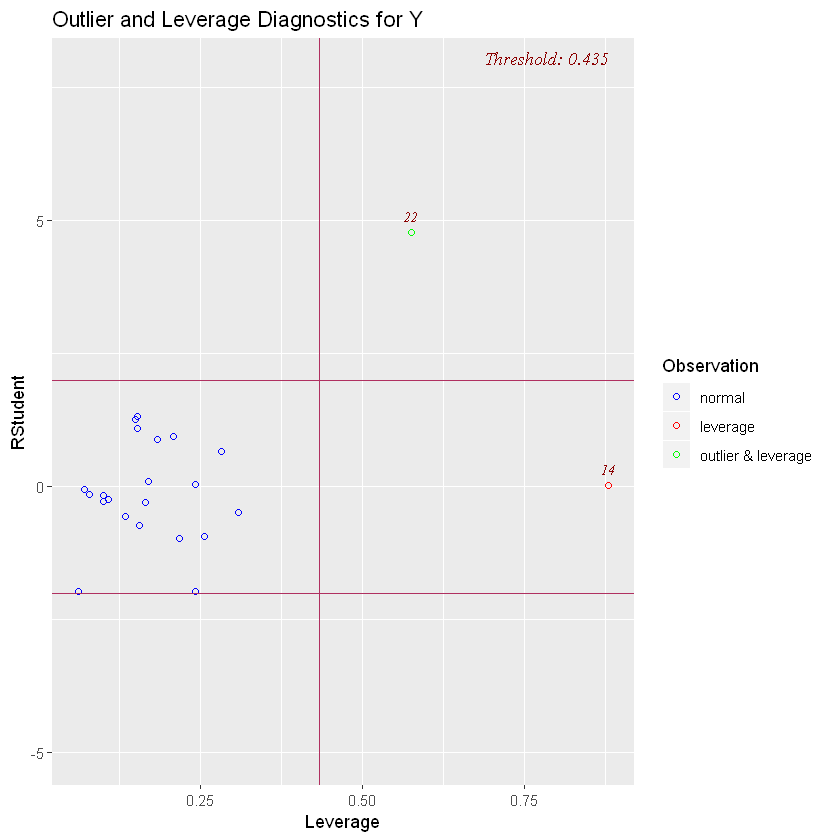

In [41]:
ols_plot_resid_lev(model_1)

Powyższy wykres pozwala zaobserwować, że pośród danych są dwie obserwacje o wysokiej
dźwigni (nr 14 i nr 22) oraz, że jedna z nich jest również obserwacją odstająca (nr 22).

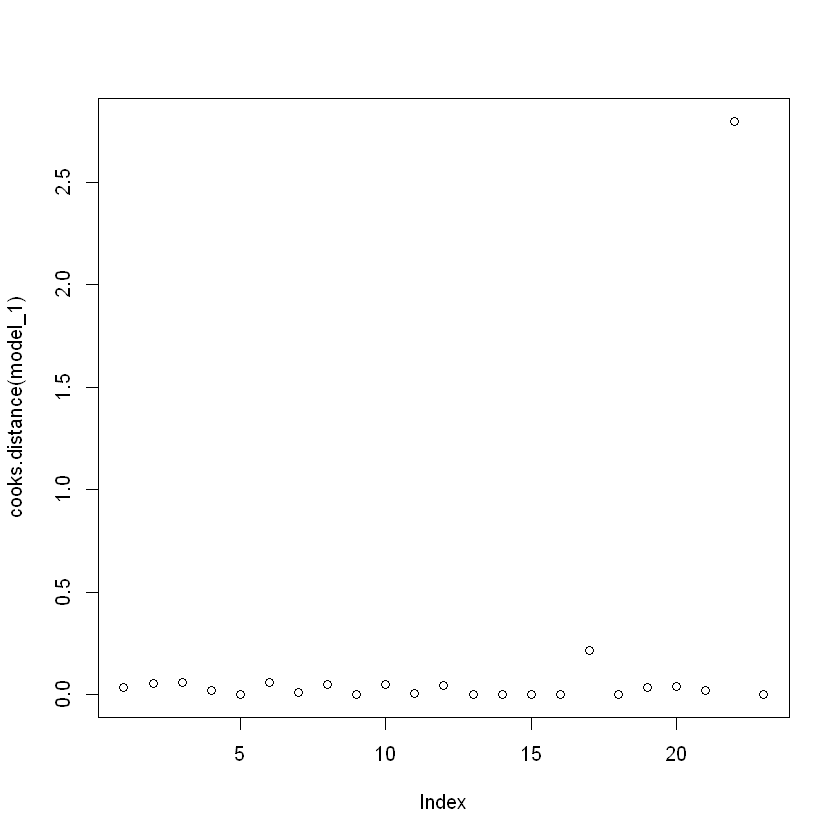

In [42]:
plot(cooks.distance(model_1))

Na wykresie odległości Cooke’a można zauważyć, że po raz kolejny obserwacja nr 22 jest
obserwacją odstającą oraz obserwacja nr 17 wyróżnia się bardziej niż reszta. W celu
zweryfikowania czy jest odstająca został wykonany kolejny wykres.

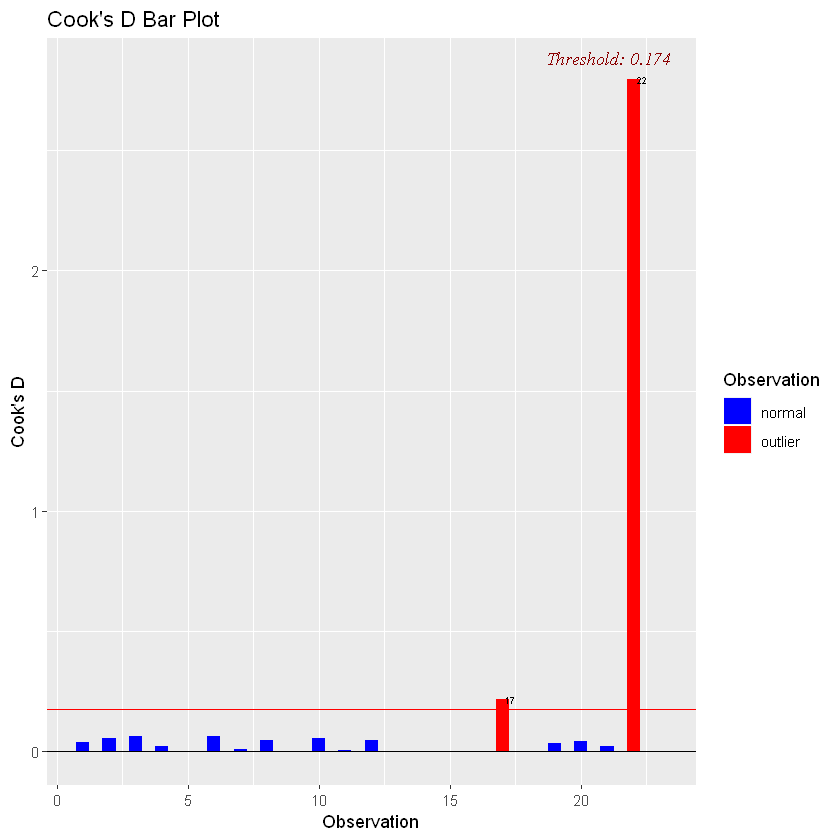

In [44]:
ols_plot_cooksd_bar(model_1)

Powyższy wykres obserwację nr 17 jako odstającą, co nie pokrywa się z poprzednimi
wykresami, a więc ciężko jednoznacznie określić ją mianem outlier’a.

## Wnioski końcowe <br>
Analiza regresji oraz stworzenie modelu ekonometrycznego pozwoliło stwierdzić, że
największy wpływ na cenę jednosilnikowych samolotów produkowanych w latach 1947 – 1979
miały zmienne: <br> Aspect ratio (pl. wydłużenie płata) i Lift-to-Drag Ratio (pl. doskonałość
aerodynamiczna). <br> Wzrost pierwszej z nich sprawia, że cena samolotu spada. <br> Jest to
spowodowane faktem, że najwyższe wartości Aspect ratio odnotowywane są w samolotach
typu: szybowiec, które są relatywnie tańsze. <br> Druga ze zmiennych wpływa natomiast na zmienną
objaśnianą proporcjonalnie. Wraz ze wzrostem Lift-to-Drag Ratio wzrasta również cena
samolotu ceteris paribus.<br> Zmiennymi, które również wpływają na cenę jednosilnikowych
samolotów, lecz nie w tak znacznym stopniu są jego waga oraz maksymalny ciąg. <br>
Wykonany model ekonometryczny można uznać za poprawny, ponieważ jego reszty posiadają
rozkład normalny oraz nie występuje heteroskedastyczność. Dalsza analiza wykazała również,
że nie występuje współliniowość. <br>
Identyfikacja obserwacji odstających, o wysokiej dźwigni, wpływowych wykazała, że w
zbiorze danych występują dwie obserwacje o wysokiej dźwigni (nr 14 i nr 22). Oznacza to, że
mają one silny wpływ na resztę obserwacji.<br> Dodatkowo obserwacja nr 22 jest również
outlier’em (obserwacją odstającą). Podejrzaną o bycie obserwacją odstającą jest również
obserwacja nr 17, jednakże znajduje się ona na granicy i raz jest klasyfikowana jako outlier, a
raz nie, dlatego ciężko podjąć ostateczną decyzję, gdzie ją przypisać.